In [1]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from scipy.cluster.hierarchy import dendrogram, linkage 
from semcor_bert_utils import *

In [2]:
sparsity_ranks = pd.read_csv('data/semcor_sparsity.csv')
sparsity_ranks.iloc[:20]

,word,pos,freq_sd,senses_for_pos
0,be,v,2753.646765,8
1,have,v,341.328009,6
2,do,v,214.057214,2
3,make,v,176.710568,8
4,see,v,128.110418,13
5,get,v,109.046114,5
6,come,v,104.112211,6
7,give,v,80.185312,11
8,go,v,77.299226,5
9,show,v,62.752327,2


In [3]:
model = initialize_model()

In [4]:
place_embeds, place_labels = run_pipeline('place', 'n', model)

Getting data from SEMCOR
Senses for word place
Getting sentences for relevant senses
Number of sentences for sense ('n', '01') 57
Number of sentences for sense ('n', '02') 31
Number of sentences for sense ('n', '03') 17
Generating BERT embeddings


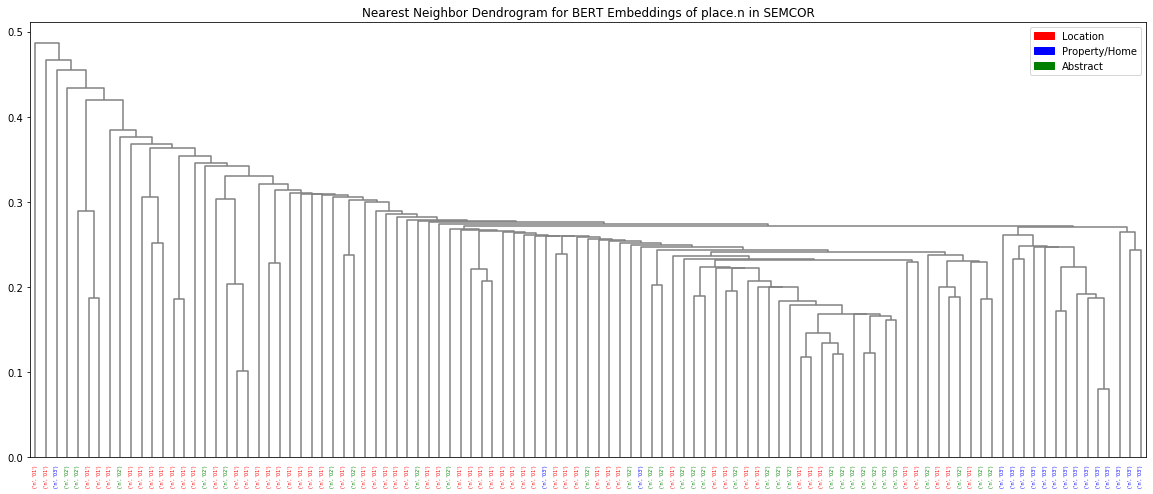

In [18]:
plot_dendrogram(place_embeds, {"('n', '01')": 'r', "('n', '02')": 'g', "('n', '03')": 'b'},
               {0:{'color': 'r', 'label': 'Location'}, 1: {'color': 'b', 'label': 'Property/Home'},
               2: {'color': 'g', 'label': 'Abstract'}}, 'place.n')

In [9]:
from sklearn.decomposition import PCA

In [10]:
place_embeds = np.array(place_embeds)

In [13]:
transposed_place = np.transpose(place_embeds)
test_pca = PCA(n_components = 10)
pca_embeds = test_pca.fit(transposed_place).components_
sum(test_pca.explained_variance_ratio_)

0.7351093199104071

Text(0.5, 1.0, 'PCA on BERT embeddings of place.n')

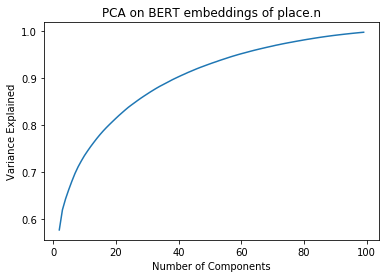

In [14]:
ev_ratios = []
n_comps = range(2, 100)
for c in n_comps:
    pca = PCA(n_components = c)
    pca.fit(transposed_place)
    ev_ratios.append(sum(pca.explained_variance_ratio_))
plt.plot(n_comps, ev_ratios)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.title("PCA on BERT embeddings of place.n")

In [21]:
!pip install sklearn

In [24]:
import sklearn.mixture

In [67]:
dpgmm = sklearn.mixture.BayesianGaussianMixture(n_components = 80, 
                                                weight_concentration_prior_type='dirichlet_process')

In [68]:
test_pca.components_.T.shape

(105, 10)

In [69]:
np.unique(dpgmm.fit_predict(test_pca.components_.T))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 78, 79])